# Removing Trends - Lab

## Introduction

In this lab, you'll practice your detrending skills!

## Objectives

You will be able to:
* Learn how to remove trends and seasonality
* Use a log transformation to minimize non-stationarity
* Use rolling means to reduce non-stationarity
* Use differencing to reduce non-stationarity

## Detrending the Airpassenger data

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Import passengers.csv and set it as a time-series object. Plot the TS
df= pd.DataFrame(pd.read_csv("passengers.csv"))


In [2]:
df.head()

,Month,#Passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


In [3]:
df['Month']= pd.to_datetime(df['Month'])

In [4]:
df.set_index('Month', inplace= True)

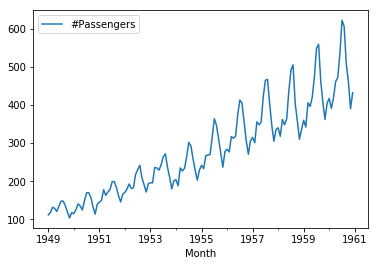

In [5]:
df.head()
df.plot()
plt.show;

In [6]:
df.isna().sum()

#Passengers    0
dtype: int64

## Create a stationarity check

At this stage, we can use the code from previous labs to create a function `stationarity_check(ts)` that takes in a time series object and performs stationarity checks including rolling statistics and the Dickey Fuller test. 

We want the output of the function to:
- Plot the original time series along with the rolling mean and rolling standard deviation in one plot
- Output the results of the Dickey-Fuller test

In [7]:
df.columns

Index(['#Passengers'], dtype='object')

In [8]:
# Create a function to check for the stationarity of a given timeseries using rolling stats and DF test
# Collect and package the code from previous lab

from statsmodels.tsa.stattools  import adfuller

In [9]:
help(adfuller)

Help on function adfuller in module statsmodels.tsa.stattools:

adfuller(x, maxlag=None, regression='c', autolag='AIC', store=False, regresults=False)
    Augmented Dickey-Fuller unit root test
    
    The Augmented Dickey-Fuller test can be used to test for a unit root in a
    univariate process in the presence of serial correlation.
    
    Parameters
    ----------
    x : array_like, 1d
        data series
    maxlag : int
        Maximum lag which is included in test, default 12*(nobs/100)^{1/4}
    regression : {'c','ct','ctt','nc'}
        Constant and trend order to include in regression
    
        * 'c' : constant only (default)
        * 'ct' : constant and trend
        * 'ctt' : constant, and linear and quadratic trend
        * 'nc' : no constant, no trend
    autolag : {'AIC', 'BIC', 't-stat', None}
        * if None, then maxlag lags are used
        * if 'AIC' (default) or 'BIC', then the number of lags is chosen
          to minimize the corresponding information 

In [10]:
rollingmean = df.rolling(12).mean()

In [11]:
rollingmean.dropna(inplace= True)

In [12]:
adfuller(rollingmean.iloc[:,0])

(0.8736953322570166,
 0.9927372598211598,
 2,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 336.543385747731)

In [13]:
def checkstationarity(data):
    rollingmean= data.rolling(12).mean()
    rollingmean.dropna(inplace= True)
    results= adfuller(data['#Passengers'])
    return results
    

In [14]:
checkstationarity(df)

(0.8153688792060574,
 0.9918802434376411,
 13,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 996.692930839019)

Use your newly created function on the airpassenger data set.

## Perform a log() and sqrt() transform

In [15]:
# Log transform timeseries and compare with original to check the effect

log_df = df.transform(lambda x: np.log(x))
sqrt_df = df.transform(lambda x: np.sqrt(x))


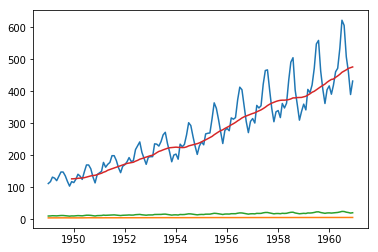

In [16]:
plt.plot(df)
plt.plot(log_df)
plt.plot(sqrt_df)
plt.plot(rollingmean)
plt.show()

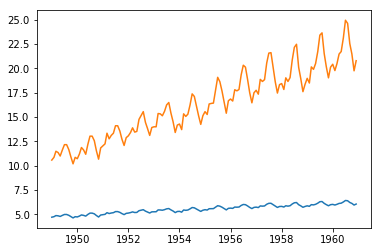

In [17]:
plt.plot(log_df)
plt.plot(sqrt_df)

moving forward, let's keep working with the log transformed data before subtracting rolling mean, differencing, etc.

## Subtracting the rolling mean

Create a rolling mean using your log transformed time series, with a time window of 7. Plot the log-transformed time series and the rolling mean together.

In [18]:
# your code here
log_rollingmean = log_df.rolling(7).mean()

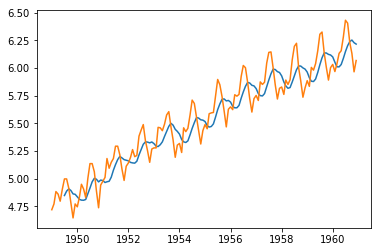

In [19]:
plt.plot(log_rollingmean)
plt.plot(log_df)

Now, subtract the rolling mean from the time series, look at the 10 first elements of the result and plot the result.

In [20]:
# Subtract the moving average from the original data and check head for Nans
log_diff = log_df - log_rollingmean

In [21]:
log_diff.dropna(inplace=True)

In [22]:
log_diff.head(10)

,#Passengers
Month,
1949-07-01,0.150059
1949-08-01,0.110242
1949-09-01,0.005404
1949-10-01,-0.113317
1949-11-01,-0.217275
1949-12-01,-0.087394
1950-01-01,-0.090241
1950-02-01,0.024099
1950-03-01,0.143499


In [23]:
# Drop the NaN values from timeseries calculated above


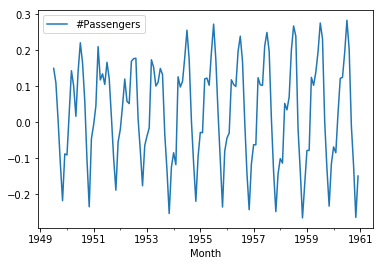

In [24]:
# Plot the result
log_diff.plot()

Finally, use your function `check_stationarity` to see if this series is considered stationary!

In [25]:
# Your code here
checkstationarity(log_diff)

(-2.34802700285881,
 0.1569455981409667,
 14,
 123,
 {'1%': -3.4846672514209773,
  '5%': -2.8853397507076006,
  '10%': -2.5794629869786503},
 -461.2243717875772)

### Based on the visuals and on the Dickey-Fuller test, what do you conclude?


## Subtracting the weighted rolling mean

Repeat all the above for the *weighter* rolling mean. Start from the log-transformed data again. Compare the Dickey-Fuller Test results. What do you conclude?

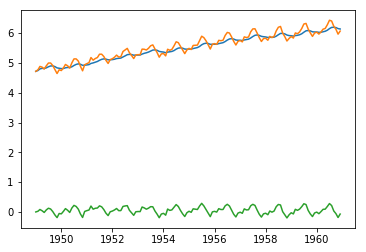

In [26]:
# Use Pandas ewma() to calculate Weighted Moving Average of ts_log

log_ewm= log_df.ewm(halflife=4).mean()
log_diffewm= log_df- log_ewm
# Plot the original data with exp weighted average
plt.plot(log_ewm)
plt.plot(log_df)
plt.plot(log_diffewm)

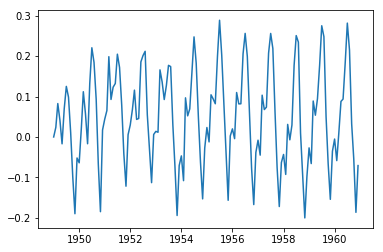

In [27]:
# Subtract the moving average from the original data and plot
log_diffewm= log_df- log_ewm

plt.plot(log_diffewm)

In [28]:
# do a stationarity check
checkstationarity(log_diffewm)

(-3.2972503220375047,
 0.015001833471826202,
 13,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 -487.60519308050493)

### Based on the visuals and on the Dickey-Fuller test, what do you conclude?


## Differencing

Using exponentially weighted moving averages, we seem to have removed the upward trend, but not the seasonality issue. Now use differencing to remove seasonality. Make sure you use the right amount of `periods`. Start from the log-transformed, exponentially weighted rolling mean-subtracted series.

After you differenced the series, run the `stationarity check` again.

In [29]:
log_diffewm.head()

,#Passengers
Month,
1949-01-01,0.000000
1949-02-01,0.023838
1949-03-01,0.082598
1949-04-01,0.040640
1949-05-01,-0.016963


In [30]:
# difference your data and look at the head
difference_log= log_diffewm.diff()

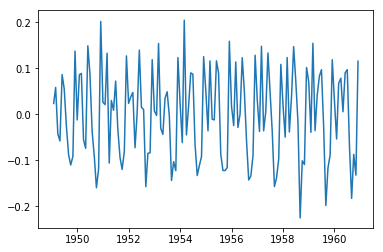

In [31]:
# plot your differenced time series
plt.plot(difference_log)

In [32]:
# drop nas
difference_log.dropna(inplace= True)

In [33]:
# perform the stationarity check
checkstationarity(difference_log)

(-3.174712004577148,
 0.02149590829611226,
 14,
 128,
 {'1%': -3.4825006939887997,
  '5%': -2.884397984161377,
  '10%': -2.578960197753906},
 -474.8136658403499)

### Your conclusion

## Summary 

In this lab, you learned how to make time series stationary through using log transforms, rolling means and differencing.